# Task 1: Coding the Central Dogma

## 1.1 Write a function that finds the complementary sequence of a given DNA sequence

In [1]:
def dna_complementary(seq, direction = 'same'):
    #make all seq uppercase
    seq = seq.upper()
    #initiate an empty seq for complementary sequence
    comp_seq = ''
    
    #check direction
    if(direction == 'reverse'):
        #for the length of seq add the correct nucleotide to the comp_seq
        for i in range(len(seq)):
            if (seq[i] == 'A'):
                comp_seq = 'T' + comp_seq 
            elif (seq[i] == 'T'):
                comp_seq = 'A' + comp_seq 
            elif (seq[i] == 'C'):
                comp_seq = 'G' + comp_seq 
            elif (seq[i] == 'G'):
                comp_seq = 'C' + comp_seq 
            #raise error if not a nucleotide
            else:
                raise ValueError('Sequence is non-canonical')
            
    elif(direction == 'same'):
        #for the length of seq add the correct nucleotide to the comp_seq
        for i in range(len(seq)):
            if (seq[i] == 'A'):
                comp_seq = comp_seq + 'T'
            elif (seq[i] == 'T'):
                comp_seq = comp_seq + 'A'
            elif (seq[i] == 'C'):
                comp_seq = comp_seq + 'G'
            elif (seq[i] == 'G'):
                comp_seq = comp_seq + 'C'
            #raise error if not a nucleotide
            else:
                raise ValueError('Sequence is non-canonical')
    
    return comp_seq

In [2]:
#testing dna_complementary same non explicit
    #expecting TGGAGAATGACCAGT
print(dna_complementary('acctctTACTGgtcA'))

TGGAGAATGACCAGT


In [3]:
#testing dna_complementary same explicit
    #expecting TGGAGAATGACCAGT
print(dna_complementary('acctctTACTGgtcA', 'same'))

TGGAGAATGACCAGT


In [4]:
#testing dna_complementary reverse explicit
    #expecting TGACCAGTAAGAGGT
print(dna_complementary('acctctTACTGgtcA', 'reverse'))

TGACCAGTAAGAGGT


In [5]:
#testing dna_complementary non canonical character
    #expecting ValueError: sequence is non-canonical
print(dna_complementary('acc2ctTACTGgtcA'))

ValueError: Sequence is non-canonical

## 1.2 Write a function that finds the RNA sequence of a given DNA sequence

In [6]:
def dna_rna(seq):
    #make sure all characters in seq are uppercase
    seq = seq.upper()
    
    #check the the seq only contains U, T, A, C, G
    #initiate a list with acceptable char
    valid_characters = 'UTGAC'
    canonical_test = True
    for i in seq:
        if i not in valid_characters:
            canonical_test = False
    
    #check that all the chacracters are UTACG
    if(canonical_test == False):
        #return error for noncanonical characters
        raise ValueError('Seqeuence is not RNA or DNA, includes noncanonical characters')
    
    #check if there are both Us and Ts
    elif('U' in seq and 'T' in seq):
        raise ValueError('Sequence is not RNA or DNA, includes both U and T')
    
    #check if there are U and no T
    elif('U' in seq and 'T' not in seq):
        return (seq, 'Input sequence is RNA')

    #check that there is no U in the seq meaning that the input is valid
    elif ('U' not in seq):
        #return the seq with the T replaced with U
        return seq.replace("T", "U")

In [7]:
#testing dna_rna
    #expecting ACCUCUUACUGGUCA
print(dna_rna('acctctTACTGgtcA'))

ACCUCUUACUGGUCA


In [8]:
#testing dna_rna with rna
    #expecting ACCUCUACUGGUCA
print(dna_rna('accucUACUGgucA'))

('ACCUCUACUGGUCA', 'Input sequence is RNA')


In [9]:
#testing dna_rna with seq without U or T
    #expecting ACCGGCAGCAGAAGCC
print(dna_rna('aCCGgcAgcAGaagcc'))

ACCGGCAGCAGAAGCC


In [10]:
#testing dna_rna with non-canonical characters
    #expecting ValueError: sequence is non-canonical
print(dna_rna('acACTTTAGCTAGCT2ACGT'))

ValueError: Seqeuence is not RNA or DNA, includes noncanonical characters

In [12]:
#testing dna_rna with seq with both U and T
    #expecting ValueError: Sequence is not RNA or DNA, includes both U and T
print(dna_rna('acctcUACTGgucA'))

ValueError: Sequence is not RNA or DNA, includes both U and T

## 1.3 Write a function that finds the amino acid sequence of a given RNA sequence

In [14]:
def rna_aa(seq):
    #Need to define a dictionary of triplet to amino acid mappings.
    rna_codon_table = {
        'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
        'UGU': 'C', 'UGC': 'C',
        'GAU': 'D', 'GAC': 'D',
        'GAA': 'E', 'GAG': 'E',
        'UUU': 'F', 'UUC': 'F',
        'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G',
        'CAU': 'H', 'CAC': 'H',
        'AUU': 'I', 'AUC': 'I', 'AUA': 'I',
        'AAA': 'K', 'AAG': 'K',
        'UUA': 'L', 'UUG': 'L', 'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L',
        'AUG': 'M',
        'AAU': 'N', 'AAC': 'N',
        'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
        'CAA': 'Q', 'CAG': 'Q',
        'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AGA': 'R', 'AGG': 'R',
        'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'AGU': 'S', 'AGC': 'S',
        'ACU': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
        'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V',
        'UGG': 'W',
        'UAU': 'Y', 'UAC': 'Y',
        'UAA': '*', 'UAG': '*', 'UGA': '*',
    }
    
    #make sure all characters in seq are uppercase
    seq = seq.upper()
    
    #check that the sequence is RNA and has valid characters
    #initiate a list with acceptable char
    valid_characters = 'UGAC'
    canonical_test = True
    for i in seq:
        if i not in valid_characters:
            canonical_test = False
    
    #check that all the chacracters are UTACG
    if(canonical_test == False):
        #return error for noncanonical characters
        raise ValueError('Seqeuence is not RNA and/or includes noncanonical characters')
    
    #create an empty aa sequence
    aa_seq = []
    
    #for the length of the input by 3
    for i in range(0, len(seq), 3):
        #get the current codon
        codon = seq[i:i+3]
        #get the current amino acid from the table that matches to the codon
        aa = rna_codon_table.get(codon, "Unknown")
        
        #add the current amino acid onto the sequence
        aa_seq.append(aa)
    
    #combine all the aa together
    aa_seq = "".join(aa_seq)
        
    return aa_seq

In [15]:
#testing rna_aa
    #expecting 'GRVELCSR*'
rna_aa("GGuAGAgUCgAGCuUugCUcuCGaUAg")

'GRVELCSR*'

In [16]:
#testing rna_aa with noncananical char
    #expecting error
rna_aa("GGcagcGacuc3ccgCCAAgcagc")

ValueError: Seqeuence is not RNA and/or includes noncanonical characters

In [17]:
#testing rna_aa that is not RNA
    #expecting error
rna_aa("GTAGCtcgATCggctagcTC")

ValueError: Seqeuence is not RNA and/or includes noncanonical characters

## 1.4 Tying it all together: Write a higher-order function that combines 1.1-1.3.

In [18]:
def dna_aa(seq, direction = "same"):
    #run the dna complementary function with direction
    dna_comp = dna_complementary(seq, direction)
    
    #return the dna to rna and then rna to amino acid of the complementary dna seq
    return(rna_aa(dna_rna(dna_comp)))

In [19]:
#testing dna_aa
    #expecting'LT*SIDRAMHAIAIRI'
dna_aa("GACTGGACTAGCTAGCtagctcgatACGtacgctAGCGCTAGGCTtaA")

'LT*SIDRAMHAIAIRI'

In [20]:
#testing dna_aa reverse
    #expectingLSLALAYVSS*LASPV'
dna_aa("GACTGGACTAGCTAGCtagctcgatACGtacgctAGCGCTAGGCTtaA", "reverse")

'LSLALAYVSS*LASPV'

In [21]:
#testing noncanonical character
    #expecting error
dna_aa("GCTCgatgcctCGActgCGtacg8CGTAgcggctagctgatcg")

ValueError: Sequence is non-canonical

## 1.5 Protein annotator

In [92]:
import minotaor
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Replace the sequence with your own sequence (insulin [Homo sapiens] GenBank: AAA59172.1)
protein = Seq("MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN")
protein_record = SeqRecord(protein, id="example", annotations={"molecule_type": "protein"})

protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive

In [93]:
protein_record

SeqRecord(seq=Seq('MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKT...own'), id='example', name='<unknown name>', description='<unknown description>', dbxrefs=[])

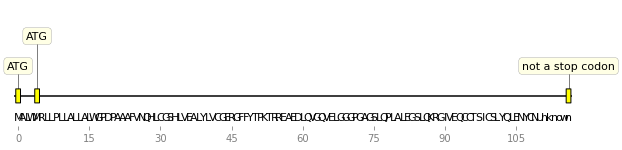

In [94]:
graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)
graphic_record.plot_sequence(ax)

It is interesting to see that there are two start codons detected but not a stop codon. This lack of stop codon does makes sense as this sequence is notated in NCBI's database a precurser, thus there would be more of the insulin coding sequence following the sequence analyzed here.

“NCBI - Insulin [Homo Sapiens].” National Center for Biotechnology Information, U.S. National Library of Medicine, www.ncbi.nlm.nih.gov/protein/AAA59172.1?report=genpept.

# Task 2: Wrapping it all together with raw data

2.1 Write a function that reads the fastq file and extracts all sequences that have a quality scores above Q10.

In [25]:
from Bio import SeqIO

In [59]:
def extract_seqs(fasta_file_path):
    """Extracts sequences from a fastq file path if the quality of all bases is >= Q10"""    
    # Create an empty dictionary
    filtered_numbers = {}
    count = 0
    
    for record in SeqIO.parse(fasta_file_path, "fastq"):
        # Access quality scores for each base in the sequence
        curr_scores = record.letter_annotations["phred_quality"]
        if all(s >= 10 for s in curr_scores):
            #store the record id as a key and the record sequence as the value into the dictionary
            filtered_numbers[str(record.id)] = str(record.seq)
            count += 1
    
    print (count)
    return filtered_numbers

In [60]:
#testing extract seqs 
    #expect to have 5724 sequences count
extract_seqs("sample10000.fastq")

5724


{'ERR016162.31734339': 'AAGAATTTTTAAATTTCCATCTTGATTTCATTGTTGACCCCAAAATTATTCAGGAGTAGGTTATTTATTTTCCATGTATTTTCATGATTTTG',
 'ERR016162.11626500': 'GAATTATCGAATGGAATCGAAGAGAATCATCGAATGGACCCGAATGGAATCATCTAATGGAATGGAATGGAATAATCCATGGACTCGAATGC',
 'ERR016162.22472995': 'TTTATTTTTTAAATTATAATTTAAGTTCTAGGGCACATGTGCACAACGTGCAGGTTTGTTACATATGTATATATGTGCCATGTTGGTGTGCT',
 'ERR016162.15992012': 'CAAATGATACAGAAACCTTATGGAACCTGTAAGGTTAAATCATGCATTTCTGAAAGTAGTAATAATATTTACTTTACTTCCAGTGGGTTAAT',
 'ERR016162.21114782': 'TTCCAGTAAGGGTACCAAGACAATCTAATGGAGAAAGAATACTCTTTTCATCCCATGGTGTGGGACAAATAGAAATAGACATGCAAAGAAAA',
 'ERR016162.19132565': 'ATAAATATGGTACACCTAGTATGTCTAGTCAAAGACTCCTAACAAGGCAGAATGTGAACTTACAGTAAAGGCTTTCCAAGATGAGGAAACCA',
 'ERR016162.31848060': 'TTTTGGACACCGTGAACCAGCACCGGGCTGTGTCAGCCCAGCTCGAGGGGCCAGGGCAGAGGCAGGGTTCACGGAGACGCAGATTCTGCCAC',
 'ERR016162.34741020': 'AAAGTGAAAGTGCTGTCTATTTGATGCCAATTTATCATTTTAACTGCTTGCATTTTGCAACATGTAAACGACAGTAGCTGGTTTTCTATTGC',
 'ERR016162.27825684': 'GGTGTGTCCTGGGGGCTCCACCTT

In [98]:
class Genome:
    """
    Read, store, and analyze the contents of a genome from a FASTA file
    """
    def __init__(self, filepath):
        self.filepath = filepath
        self.dna_seqs = None
        self.dna_complementary_seqs = None
        self.rna_seqs = None
        self.aa_seqs = None
    
    # UPDATE THE FOLLOWING FUNCTIONS TO POPULATE THE ABOVE PROPERTIES
    def extract_seqs(self):
        """Extracts sequences from a fastq file path if the quality of all bases is >= Q10"""    
        # Create an empty dictionary
        filtered_numbers = {}

        for record in SeqIO.parse(self.filepath, "fastq"):
            # Access quality scores for each base in the sequence
            curr_scores = record.letter_annotations["phred_quality"]
            if all(s >= 10 for s in curr_scores):
                #store the record id as a key and the record sequence as the value into the dictionary
                filtered_numbers[str(record.id)] = str(record.seq)
                
        #save the new dictionary into the self attribute
        self.dna_seqs = filtered_numbers
        return self.dna_seqs
    
    def complementary_seqs(self):
        #make sure that self.dna_seqs is not empty
        if not self.dna_seqs:
            #return error for empty dna_seqs dictionary
            raise ValueError('DNA Sequence dictionary is empty')
        
        #initiate an empty dictionary for all complementary sequences
        comp_seq_list = {}
        
        #iterate through the dictionary
        for key in self.dna_seqs:
            #set seq to the sequence associated with the key
            seq = self.dna_seqs[key]
            
            #make seq uppercase 
            seq = seq.upper()
            #initiate an empty seq for complementary sequence
            comp_seq = ''

            #no direction variable to check
            for i in range(len(seq)):
                    if (seq[i] == 'A'):
                        comp_seq = 'T' + comp_seq 
                    elif (seq[i] == 'T'):
                        comp_seq = 'A' + comp_seq 
                    elif (seq[i] == 'C'):
                        comp_seq = 'G' + comp_seq 
                    elif (seq[i] == 'G'):
                        comp_seq = 'C' + comp_seq 
                    #raise error if not a nucleotide
                    else:
                        raise ValueError('Sequence is non-canonical')
            
            #save the new sequence into the dictionary
            comp_seq_list[key] = comp_seq
                
        #save the new dictionary into the self attribute
        self.dna_complementary_seqs = comp_seq_list
        return comp_seq_list

    def rna_seqs(self):
        #make sure that self.dna_complementary_seqs is not empty
        if not self.dna_complementary_seqs:
            #return error for empty dna_complementary_seqs dictionary
            raise ValueError('DNA Complementary Sequence dictionary is empty')
        
        #initiate an empty dictionary for all rna sequences
        rna_seqs_list = {}
        
        #iterate through the dictionary
        for key in self.dna_complementary_seqs:
            #set seq to the sequence associated with the key
            seq = self.dna_complementary_seqs[key]
            
            #make sure all characters in seq are uppercase
            seq = seq.upper()

            #check the the seq only contains U, T, A, C, G
            #initiate a list with acceptable char
            valid_characters = 'UTGAC'
            canonical_test = True
            for i in seq:
                if i not in valid_characters:
                    canonical_test = False

            #check that all the chacracters are UTACG
            if(canonical_test == False):
                #return error for noncanonical characters
                raise ValueError('Seqeuence is not RNA or DNA, includes noncanonical characters')

            #check if there are both Us and Ts
            elif('U' in seq and 'T' in seq):
                raise ValueError('Sequence is not RNA or DNA, includes both U and T')

            #check if there are U and no T
            elif('U' in seq and 'T' not in seq):
                 raise ValueError('Input sequence is RNA')

            #check that there is no U in the seq meaning that the input is valid
            elif ('U' not in seq):
                #set seq with the T replaced with U
                seq = seq.replace("T", "U")

            #set the new sequence to the new dictionary
            rna_seqs_list[key] = seq
        
        #save the new dictionary into the self attribute
        self.rna_seqs = rna_seqs_list
        return rna_seqs_list
    
    def aa_seqs(self):
        #make sure that self.dna_complementary_seqs is not empty
        if not self.rna_seqs:
            #return error for empty rna_seqs dictionary
            raise ValueError('RNA Sequence dictionary is empty')
        
        #Need to define a dictionary of triplet to amino acid mappings.
        rna_codon_table = {
            'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
            'UGU': 'C', 'UGC': 'C',
            'GAU': 'D', 'GAC': 'D',
            'GAA': 'E', 'GAG': 'E',
            'UUU': 'F', 'UUC': 'F',
            'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G',
            'CAU': 'H', 'CAC': 'H',
            'AUU': 'I', 'AUC': 'I', 'AUA': 'I',
            'AAA': 'K', 'AAG': 'K',
            'UUA': 'L', 'UUG': 'L', 'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L',
            'AUG': 'M',
            'AAU': 'N', 'AAC': 'N',
            'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
            'CAA': 'Q', 'CAG': 'Q',
            'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AGA': 'R', 'AGG': 'R',
            'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'AGU': 'S', 'AGC': 'S',
            'ACU': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T',
            'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V',
            'UGG': 'W',
            'UAU': 'Y', 'UAC': 'Y',
            'UAA': '*', 'UAG': '*', 'UGA': '*',
        }

        #initiate an empty dictionary for all protein sequences
        protein_seqs_list = {}
        
        #iterate through the dictionary
        for key in self.rna_seqs:
            #set seq to the sequence associated with the key
            seq = self.rna_seqs[key]
        
            #make sure all characters in seq are uppercase
            seq = seq.upper()

            #check that the sequence is RNA and has valid characters
            #initiate a list with acceptable char
            valid_characters = 'UGAC'
            canonical_test = True
            for i in seq:
                if i not in valid_characters:
                    canonical_test = False

            #check that all the chacracters are UTACG
            if(canonical_test == False):
                #return error for noncanonical characters
                raise ValueError('Seqeuence is not RNA and/or includes noncanonical characters')

            #create an empty aa sequence
            aa_seq = []

            #for the length of the input by 3
            for i in range(0, len(seq), 3):
                #get the current codon
                codon = seq[i:i+3]
                #get the current amino acid from the table that matches to the codon
                #if the aa does not match anything on the table, simply remove
                aa = rna_codon_table.get(codon, "")

                #add the current amino acid onto the sequence
                aa_seq.append(aa)

            aa_seq = "".join(aa_seq)
            
            #set the new sequence to the new dictionary
            protein_seqs_list[key] = aa_seq
        
        #save the new dictionary into the self attribute
        self.aa_seqs = protein_seqs_list
        return protein_seqs_list

    def annot_aa_plot(self, seqid):
        #make sure that self.aa_seqs is not empty
        if not self.aa_seqs:
            #return error for empty aa_seqs dictionary
            raise ValueError('RNA Sequence dictionary is empty')
            
        #get the protein sequence from the aa_seqs dictionary
        protein = Seq(self.aa_seqs[seqid])
        
        #code block from 1.5
        protein_record = SeqRecord(protein, id="example", annotations={"molecule_type": "protein"})

        protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive
        
        graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
        ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)
        
        #print out the annotations plot
        graphic_record.plot_sequence(ax)

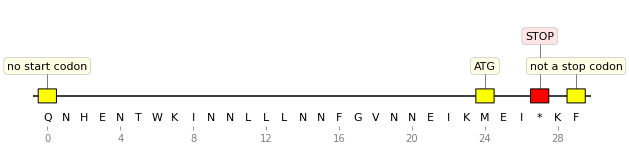

In [99]:
t1 = Genome("sample10000.fastq")
Genome.extract_seqs(t1)
#print("this is dna_seq saved", t1.dna_seqs)

Genome.complementary_seqs(t1)
#print("this is the comp_seqs saved", t1.dna_complementary_seqs)

Genome.rna_seqs(t1)
#print("this is the rna_seqs saved", t1.rna_seqs)

Genome.aa_seqs(t1)
#print("this is the aa_seqs saved", t1.aa_seqs)
#expecting each seq with 30 aa in length even though the input has 92 rna. The last 2 are removed as it would not match to codon

Genome.annot_aa_plot(t1, "ERR016162.31734339")